# Comprehensive Tutorial on Scheduling Metrics: Throughput, Turnaround Time, Fairness, and Schedulability

This Jupyter Notebook is a complete guide for beginners aiming to become scientists or researchers in fields like computer science or systems engineering. It covers **Throughput**, **Turnaround Time**, **Fairness**, and **Schedulability** with:
- **Theory**: Clear explanations with analogies.
- **Practical Code**: Python simulations to experiment with each metric.
- **Visualizations**: Charts and diagrams to aid understanding.
- **Applications**: Real-world use cases.
- **Research Directions**: Ideas for cutting-edge research.
- **Rare Insights**: Lesser-known facts and advanced considerations.
- **Mini and Major Projects**: Practical projects to build your skills.
- **Additional Topics**: Key concepts not covered in the previous tutorial but essential for a scientist.

This notebook is designed for you to take notes, run code, and explore scheduling as a foundation for your research career. Let’s dive in!

## Prerequisites
- Basic Python knowledge (lists, functions).
- Install libraries: `pip install matplotlib numpy pandas`.
- No prior scheduling knowledge required.

## Introduction

Scheduling metrics help measure how systems (e.g., CPUs, factories, networks) manage tasks. As a scientist, you’ll use these to design efficient, fair, and reliable systems. This notebook provides hands-on examples and projects to prepare you for research.

**Analogy**: Think of a chef managing orders in a busy kitchen. The chef decides how many dishes to cook per hour (throughput), how long each customer waits (turnaround time), whether all customers are served fairly (fairness), and if urgent orders meet deadlines (schedulability).

## 1. Throughput

### Theory

**Throughput** measures the **number of tasks completed per unit time**. It reflects system efficiency.
- **Formula**: Throughput = Number of Tasks Completed / Time.
- **Goal**: Maximize throughput.
- **Example**: A factory producing 100 widgets per hour has a throughput of 100 widgets/hour.

**Analogy**: A conveyor belt moving toys off an assembly line. Faster belts or more workers increase throughput.

**Applications**:
- **Cloud Computing**: Number of user queries processed per second.
- **Manufacturing**: Items produced per day.
- **Networks**: Packets transmitted per second.

**Rare Insight**: Throughput can be misleading in systems with variable task sizes. A system completing many small tasks may have high throughput but poor performance on large tasks, requiring careful analysis.

### Practical Code: Simulate Throughput

Let’s simulate a server processing tasks with random durations to calculate throughput.

Throughput: 0.35 tasks/second


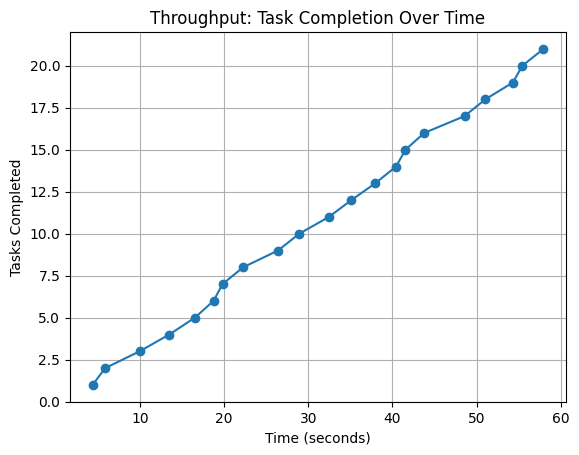

In [1]:
import random
import matplotlib.pyplot as plt

# Simulate task processing
def simulate_throughput(num_tasks, max_duration, total_time):
    tasks_completed = 0
    current_time = 0
    task_times = []
    
    while current_time < total_time and tasks_completed < num_tasks:
        duration = random.uniform(1, max_duration)  # Random task duration
        if current_time + duration <= total_time:
            current_time += duration
            tasks_completed += 1
            task_times.append(current_time)
        else:
            break
    
    throughput = tasks_completed / total_time
    return throughput, task_times

# Parameters
num_tasks = 100
max_duration = 5  # Max task duration in seconds
total_time = 60  # Total simulation time in seconds

# Run simulation
throughput, task_times = simulate_throughput(num_tasks, max_duration, total_time)
print(f"Throughput: {throughput:.2f} tasks/second")

# Visualize task completion
plt.plot(task_times, list(range(1, len(task_times) + 1)), marker='o')
plt.xlabel('Time (seconds)')
plt.ylabel('Tasks Completed')
plt.title('Throughput: Task Completion Over Time')
plt.grid(True)
plt.show()

**Explanation**:
- The code simulates tasks with random durations (1 to 5 seconds).
- It tracks how many tasks finish in 60 seconds and calculates throughput.
- The plot shows tasks completed over time, helping visualize throughput.

**Visualization Insight**: A steeper slope in the plot indicates higher throughput.

### Research Directions
- **Optimize Throughput**: Explore parallel processing (e.g., multi-threading) to increase throughput.
- **Dynamic Systems**: Study throughput in systems with fluctuating workloads (e.g., cloud servers during peak hours).
- **Energy Efficiency**: Research how to maximize throughput while minimizing power consumption.

### Mini Project: Throughput Simulator
- **Task**: Extend the code to compare throughput for different scheduling algorithms (e.g., First-Come-First-Serve vs. Shortest Job First).
- **Steps**:
  1. Add a scheduling policy (e.g., sort tasks by duration for Shortest Job First).
  2. Plot throughput for both algorithms.
  3. Analyze which performs better.

### Major Project: Cloud Server Throughput Analysis
- **Task**: Simulate a cloud server handling user requests with varying sizes.
- **Goal**: Design an algorithm to maximize throughput under resource constraints (e.g., limited CPU cores).
- **Tools**: Use Python with `simpy` for discrete-event simulation.
- **Research Question**: How does task prioritization affect throughput in a cloud environment?

## 2. Turnaround Time

### Theory

**Turnaround Time** is the **total time a task takes from arrival to completion**, including waiting and execution.
- **Formula**: Turnaround Time = Completion Time − Arrival Time = Waiting Time + Execution Time.
- **Goal**: Minimize turnaround time.
- **Example**: A customer waits 5 minutes in a queue and 10 minutes for service; turnaround time is 15 minutes.

**Analogy**: At a bank, turnaround time is how long you wait from joining the line to finishing your transaction.

**Applications**:
- **Operating Systems**: Time to complete a program.
- **Logistics**: Time to deliver a package.
- **Healthcare**: Time for a patient to receive treatment.

**Rare Insight**: Turnaround time can vary significantly based on scheduling policies. For example, Shortest Job First reduces average turnaround time but may starve long tasks, a trade-off rarely discussed in beginner texts.

### Practical Code: Simulate Turnaround Time

Let’s simulate a First-Come-First-Serve (FCFS) scheduler to calculate turnaround time.

     Task  Arrival  Duration  Turnaround Time
0  Task 1        0         3                3
1  Task 2        1         2                4
2  Task 3        2         4                7
3  Task 4        5         1                5
Average Turnaround Time: 4.75 seconds


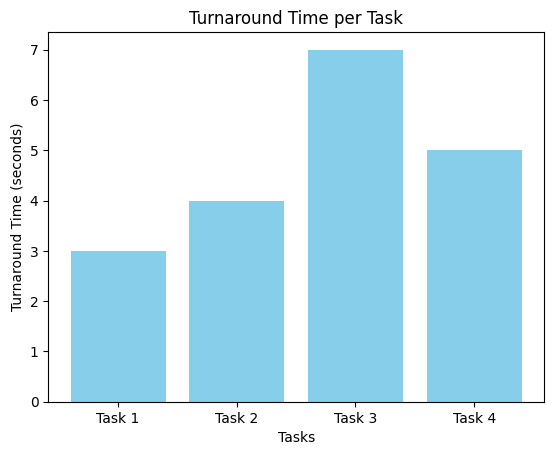

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Simulate FCFS scheduling
def simulate_fcfs(tasks):
    current_time = 0
    turnaround_times = []
    
    for arrival, duration in tasks:
        if current_time < arrival:
            current_time = arrival  # Wait for task to arrive
        completion = current_time + duration
        turnaround = completion - arrival
        turnaround_times.append(turnaround)
        current_time = completion
    
    return turnaround_times

# Generate tasks: (arrival time, duration)
tasks = [(0, 3), (1, 2), (2, 4), (5, 1)]
turnaround_times = simulate_fcfs(tasks)

# Create DataFrame for visualization
df = pd.DataFrame({
    'Task': [f'Task {i+1}' for i in range(len(tasks))],
    'Arrival': [t[0] for t in tasks],
    'Duration': [t[1] for t in tasks],
    'Turnaround Time': turnaround_times
})

print(df)
print(f"Average Turnaround Time: {np.mean(turnaround_times):.2f} seconds")

# Visualize
plt.bar(df['Task'], df['Turnaround Time'], color='skyblue')
plt.xlabel('Tasks')
plt.ylabel('Turnaround Time (seconds)')
plt.title('Turnaround Time per Task')
plt.show()

**Explanation**:
- The code simulates FCFS scheduling, where tasks are processed in arrival order.
- It calculates turnaround time for each task and the average.
- The bar chart shows turnaround time per task, highlighting variability.

**Visualization Insight**: Tasks arriving later may have longer turnaround times due to queueing.

### Research Directions
- **Scheduling Algorithms**: Compare turnaround times for FCFS, Shortest Job First, and Priority Scheduling.
- **Real-Time Systems**: Study how turnaround time impacts user experience in interactive systems.
- **Machine Learning**: Predict turnaround times using historical data.

### Mini Project: Scheduling Algorithm Comparison
- **Task**: Implement Shortest Job First (SJF) and compare its turnaround time with FCFS.
- **Steps**:
  1. Modify the code to sort tasks by duration before processing.
  2. Plot turnaround times for both algorithms.
  3. Analyze which reduces average turnaround time.

### Major Project: Hospital Patient Scheduling
- **Task**: Simulate a hospital scheduling system for patient appointments.
- **Goal**: Minimize turnaround time for patients while prioritizing emergencies.
- **Tools**: Python with `simpy` for simulation.
- **Research Question**: How does prioritizing urgent patients affect overall turnaround time?

## 3. Fairness

### Theory

**Fairness** ensures **equitable resource allocation** among tasks or users, preventing any task from being starved.
- **Metric**: Jain’s Fairness Index (JFI), where $J = 1$ is perfectly fair, and $J < 1$ is less fair.
- **Formula**: $J = \frac{(\sum x_i)^2}{n \sum x_i^2}$, where $x_i$ is the resource (e.g., CPU time) for task $i$, and $n$ is the number of tasks.
- **Goal**: Achieve high fairness (close to 1).

**Analogy**: Sharing a cake among friends. Fairness means everyone gets a similar-sized piece, not one person taking most of it.

**Applications**:
- **Networks**: Equal bandwidth for all devices.
- **Cloud Computing**: Fair CPU allocation for virtual machines.
- **Public Services**: Equitable access to resources (e.g., vaccine distribution).

**Rare Insight**: Fairness can conflict with efficiency. For example, Round-Robin scheduling ensures fairness but may increase turnaround time for short tasks, a trade-off often overlooked.

### Practical Code: Calculate Fairness

Let’s simulate resource allocation and compute Jain’s Fairness Index.

Fair Allocation JFI: 1.00
Unfair Allocation JFI: 0.49


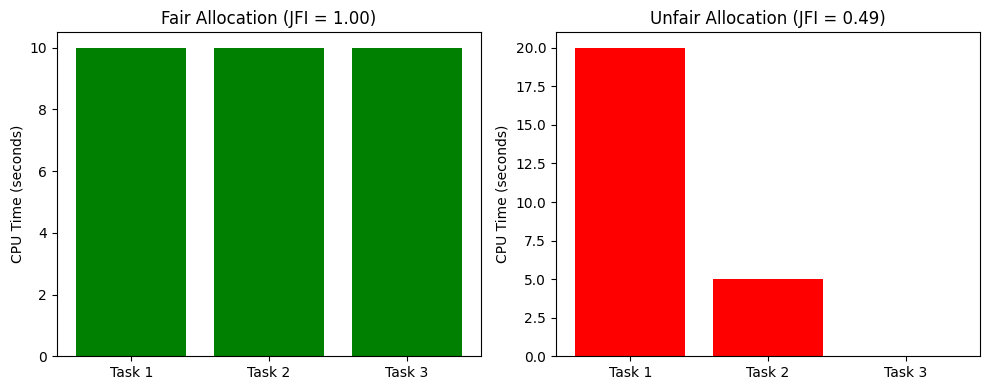

In [3]:
import matplotlib.pyplot as plt

def jains_fairness_index(resources):
    n = len(resources)
    sum_resources = sum(resources)
    sum_squares = sum(x ** 2 for x in resources)
    if sum_squares == 0:
        return 0
    return (sum_resources ** 2) / (n * sum_squares)

# Simulate two scenarios
fair_allocation = [10, 10, 10]  # Equal CPU time
unfair_allocation = [20, 5, 0]  # Unequal CPU time

fair_jfi = jains_fairness_index(fair_allocation)
unfair_jfi = jains_fairness_index(unfair_allocation)

print(f"Fair Allocation JFI: {fair_jfi:.2f}")
print(f"Unfair Allocation JFI: {unfair_jfi:.2f}")

# Visualize
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.bar(['Task 1', 'Task 2', 'Task 3'], fair_allocation, color='green')
plt.title(f'Fair Allocation (JFI = {fair_jfi:.2f})')
plt.ylabel('CPU Time (seconds)')

plt.subplot(1, 2, 2)
plt.bar(['Task 1', 'Task 2', 'Task 3'], unfair_allocation, color='red')
plt.title(f'Unfair Allocation (JFI = {unfair_jfi:.2f})')
plt.ylabel('CPU Time (seconds)')

plt.tight_layout()
plt.show()

**Explanation**:
- The code calculates JFI for two scenarios: equal and unequal resource allocation.
- The bar charts compare resource distribution, showing how fairness affects allocation.

**Visualization Insight**: Equal bar heights indicate high fairness; uneven heights show unfairness.

### Research Directions
- **Fair Scheduling**: Develop algorithms that balance fairness and performance.
- **Multi-Resource Fairness**: Study fairness across multiple resources (e.g., CPU and memory).
- **Fairness in AI**: Explore fairness in resource allocation for AI training clusters.

### Mini Project: Round-Robin Simulator
- **Task**: Simulate Round-Robin scheduling and compute JFI.
- **Steps**:
  1. Assign fixed time slices (e.g., 1 second) to each task in a loop.
  2. Calculate JFI based on CPU time received.
  3. Visualize fairness across tasks.

### Major Project: Fair Bandwidth Allocation
- **Task**: Simulate a Wi-Fi network with multiple devices.
- **Goal**: Design a fair bandwidth allocation algorithm.
- **Tools**: Python with `simpy`.
- **Research Question**: How does fairness impact network performance under heavy load?

## 4. Schedulability

### Theory

**Schedulability** determines if a system can **complete all tasks by their deadlines**, critical for real-time systems.
- **Definition**: A task set is schedulable if all tasks finish before their deadlines.
- **Test**: Utilization-based test for Rate Monotonic Scheduling (RMS).
- **Formula**: $U = \sum \frac{C_i}{T_i} \leq n (2^{1/n} - 1)$, where $C_i$ is execution time, $T_i$ is period, and $n$ is the number of tasks.

**Analogy**: A teacher assigning homework due dates. Schedulability ensures all students can finish on time without conflicts.

**Applications**:
- **Autonomous Vehicles**: Sensor processing deadlines.
- **Robotics**: Coordinating real-time tasks.
- **Telecom**: Packet delivery deadlines.

**Rare Insight**: Schedulability tests assume worst-case execution times, but real systems often have variable execution times, requiring probabilistic models for accurate analysis.

### Practical Code: Schedulability Test

Let’s test schedulability for a set of tasks using RMS.

Utilization: 0.75
Threshold: 0.78
Schedulable: Yes


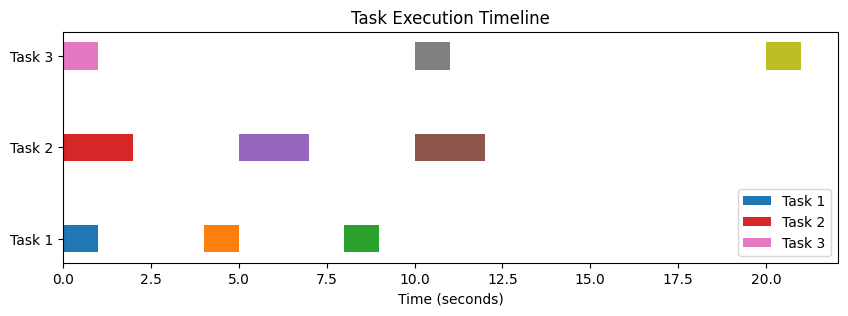

In [4]:
import math
import matplotlib.pyplot as plt

def rms_schedulability(tasks):
    n = len(tasks)
    utilization = sum(c / t for c, t in tasks)
    threshold = n * (2 ** (1 / n) - 1)
    return utilization, threshold, utilization <= threshold

# Tasks: (execution time, period)
tasks = [(1, 4), (2, 5), (1, 10)]
utilization, threshold, schedulable = rms_schedulability(tasks)

print(f"Utilization: {utilization:.2f}")
print(f"Threshold: {threshold:.2f}")
print(f"Schedulable: {'Yes' if schedulable else 'No'}")

# Visualize task timelines
plt.figure(figsize=(10, 3))
for i, (c, t) in enumerate(tasks):
    for j in range(3):  # Show 3 periods
        plt.barh(i, c, left=j * t, height=0.3, label=f'Task {i+1}' if j == 0 else None)
plt.yticks(range(len(tasks)), [f'Task {i+1}' for i in range(len(tasks))])
plt.xlabel('Time (seconds)')
plt.title('Task Execution Timeline')
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.show()

**Explanation**:
- The code tests schedulability using RMS utilization.
- It plots task execution over time, showing how tasks fit within their periods.

**Visualization Insight**: Non-overlapping bars indicate schedulable tasks; overlaps suggest potential deadline misses.

### Research Directions
- **Advanced Schedulability**: Develop tests for systems with variable execution times.
- **Mixed-Criticality Systems**: Study schedulability for tasks with different priority levels.
- **Energy-Aware Scheduling**: Ensure schedulability while minimizing power usage.

### Mini Project: EDF Scheduler
- **Task**: Implement Earliest Deadline First (EDF) scheduling and test schedulability.
- **Steps**:
  1. Sort tasks by deadline at each time step.
  2. Check if all tasks meet deadlines.
  3. Compare with RMS.

### Major Project: Real-Time Robotics Scheduler
- **Task**: Simulate a robot with tasks like navigation and obstacle detection.
- **Goal**: Ensure all tasks meet deadlines under CPU constraints.
- **Tools**: Python with `simpy`.
- **Research Question**: How does EDF compare to RMS in robotics applications?

## Additional Topics for Scientists

The previous tutorial covered the basics but missed some critical concepts for researchers. Here are additional topics to deepen your understanding:

### 5. Response Time

**Theory**: Response time is the time from task arrival to when it **starts execution** (not completion, unlike turnaround time).
- **Formula**: Response Time = Start Time − Arrival Time.
- **Importance**: Critical for interactive systems (e.g., gaming, UI responsiveness).
- **Example**: In a video game, response time is how quickly the system reacts to a player’s input.

**Code**: Modify the FCFS code to track response times (calculate start time for each task).

**Research Direction**: Study response time in real-time systems with preemption (tasks can be interrupted).

### 6. Preemption

**Theory**: Preemption allows a running task to be interrupted to run a higher-priority task.
- **Impact**: Improves schedulability and response time but increases overhead.
- **Example**: In a smartphone, a call interrupts a music app.

**Code**: Extend the EDF scheduler to include preemption (pause and resume tasks).

**Research Direction**: Analyze preemption overhead in embedded systems.

### 7. Starvation

**Theory**: Starvation occurs when a task waits indefinitely due to prioritization of others.
- **Example**: In Priority Scheduling, low-priority tasks may never run if high-priority tasks keep arriving.
- **Mitigation**: Use aging (increase priority over time) or Round-Robin.

**Code**: Simulate Priority Scheduling and detect starvation by tracking wait times.

**Research Direction**: Develop anti-starvation algorithms for cloud computing.

### 8. Scheduling Overhead

**Theory**: Scheduling overhead is the time spent deciding which task to run next.
- **Impact**: High overhead reduces throughput and schedulability.
- **Example**: Context switching in CPUs consumes time.

**Code**: Add overhead (e.g., 0.1s per switch) to the FCFS simulation and measure its impact.

**Research Direction**: Minimize overhead in high-frequency real-time systems.

## Applications Across Domains

- **Healthcare**: Schedule surgeries to minimize turnaround time and ensure fairness.
- **Autonomous Vehicles**: Ensure schedulability for safety-critical tasks.
- **Cloud Computing**: Optimize throughput and fairness for virtual machines.
- **IoT**: Balance low-power scheduling with responsiveness.

## Summary

- **Throughput**: Maximize tasks completed per time.
- **Turnaround Time**: Minimize total task time.
- **Fairness**: Ensure equitable resource sharing.
- **Schedulability**: Guarantee deadline compliance.
- **Additional Metrics**: Response time, preemption, starvation, and overhead are critical for research.

## Next Steps for Aspiring Scientists

1. Run and modify the code examples to understand each metric.
2. Start with the mini projects to build hands-on skills.
3. Tackle a major project to simulate a real-world system.
4. Read papers on scheduling (e.g., Liu and Layland’s RMS paper).
5. Explore tools like `simpy` for advanced simulations.

This notebook equips you with the theory, tools, and projects to excel as a scheduling researcher. Keep experimenting and questioning!